# Predict Students' Dropout and Academic Success

## Introduction

This dataset is put together by collecting the information about students enrolled in higher education in Europe between the academic years 2008/2009 to 2018/2019. It is acquired from several disjoint database. These include data from 17 undergraduate degrees from different fields of knowledge, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. This dataset is found here https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success.

The main goal of this project is to predict the reasons that lead to student dropout/academic success. This helps educators, administrators, and institutions improve retention rates and student performance. By using data-driven approaches, educational institutions can identify at-risk students and intervene before problems become severe. Here's are some of the ways students can benefit:

1) Early Intervention:  Institutions can intervene by offering additional support such as tutoring, counseling, or mentoring to students at risk of dropping out.

2) Customized Learning:   Based on predictions, schools can tailor learning paths for students, offering more personalized education to those who need it most.

3) Resource Allocation:   Predicting dropouts helps universities allocate resources more efficiently, ensuring that at-risk students get the right help.

4) Retention Strategies:   Universities can use these predictions to create strategies and improve student retention. These might include improving student engagement, modifying teaching methods, or enhancing social support systems.
 


## Data Understanding

In [407]:
# importing required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTETomek
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [326]:
import warnings
warnings.filterwarnings('ignore')

In [327]:
df = pd.read_csv('data.csv')
df.head()

,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


In [328]:
#splitting data into rows and columns

feature_names = df.columns.tolist()
for line in feature_names:
        Type = line.split(";")
df[Type] = df.iloc[:, 0].str.split(';',expand=True)
df = df.iloc[:, 1:]
df.head()

,Marital status,Application mode,Application order,Course,"""Daytime/evening attendance\t""",Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666666666666666,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate


In [329]:
# Renaming some column names 
df = df.rename(columns={'Nacionality': 'Nationality'})
df = df.rename(columns={'"Daytime/evening attendance\t"': 'Daytime/evening attendance'})

In [330]:
df.shape

(4424, 37)

This dataset consists of 4424 student records and 37 features. 

### Description About Each Feature 

|Variable |	Description|
|:----------------|:-------------|
|Marital status 	       |1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated (Categorical)|
|Application mode |	The method of application used by the student. (Categorical)|
|Application order |	Application order (between 0 - first choice; and 9 last choice) (Numerical)|
|Course |	33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance). (Categorical)|
|Daytime/evening attendance |	Whether the student attends classes during the day or in the evening. (Categorical)|
|Previous qualification |	1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle). (Categorical)|
|Previous qualification(grade) |	The qualification obtained by the student before enrolling in higher education  (between 0 and 200). (Numerical)|
|Nationality| 	1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian (Categorical)|
|Mother's qualification |	The qualification of the student's mother. (Categorical)|
|Father's qualification |	The qualification of the student's father. (Categorical)|
|Mother's occupation |	The occupation of the student's mother. (Categorical)|
|Father's occupation |	The occupation of the student's father. (Categorical)|
|Admission grade |	Admission grade (between 0 and 200). (Continuous)|
|Displaced |	A displaced student is a student who has enrolled in a different school or district than they were originally enrolled in due to a crisis 1 – yes 0 – no. (Categorical)|
|Educational special needs |	Whether the student has any special educational needs. (Categorical)|
|Debtor |	Whether the student is a debtor. (Categorical)|
|Tuition fees up to date 	|Whether the student's tuition fees are up to date. (Categorical)|
|Gender |	The gender of the student. (Categorical)|
|Scholarship holder |	Whether the student is a scholarship holder. (Categorical)|
|Age at enrollment 	|The age of the student at the time of enrollment. (Numerical)|
|International 	|Whether the student is an international student. (Categorical)|
|Curricular units 1st sem (credited) |	Number of curricular units credited by the student in the first semester. (Numerical)|
|Curricular units 1st sem (enrolled) |	Number of curricular units enrolled by the student in the first semester. (Numerical)|
|Curricular units 1st sem (evaluations) |	Number of curricular units evaluated by the student in the first semester. (Numerical)|
|Curricular units 1st sem (approved) |	Number of curricular units approved by the student in the first semester. (Numerical)|
|Curricular units 1st sem (grade) |	Grade average in the 1st semester (between 0 and 20)|
|Curricular units 1st sem (without evaluations) |	Number of curricular units without evalutions in the 1st semester|
|Curricular units 2nd sem (credited) |	Number of curricular units credited in the 2nd semester|
|Curricular units 2nd sem (enrolled) |	Number of curricular units enrolled in the 2nd semester|
|Curricular units 2nd sem (evaluations) |	Number of evaluations to curricular units in the 2nd semester|
|Curricular units 2nd sem (approved) |	Number of curricular units approved in the 2nd semester|
|Curricular units 2nd sem (grade) |	Grade average in the 2nd semester (between 0 and 20)|
|Curricular units 2nd sem (without evaluations) |	Number of curricular units without evalutions in the 1st semester|
|Unemployment rate |	Unemployment rate (%)|
|Inflation rate |	Inflation rate (%)
|GDP |	GDP |
|Target |	The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course|

In [331]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Marital status                                  4424 non-null   object
 1   Application mode                                4424 non-null   object
 2   Application order                               4424 non-null   object
 3   Course                                          4424 non-null   object
 4   Daytime/evening attendance                      4424 non-null   object
 5   Previous qualification                          4424 non-null   object
 6   Previous qualification (grade)                  4424 non-null   object
 7   Nationality                                     4424 non-null   object
 8   Mother's qualification                          4424 non-null   object
 9   Father's qualification                          4424

There are no missing values in this dataset. Lets convert to appropriate datatypes. 

In [332]:
#coverting to appropriate datatypes 
df['Marital status'] = df['Marital status'].astype(int)
df['Application mode'] = df['Application mode'].astype(int)
df['Application order'] = df['Application order'].astype(int)
df['Course'] = df['Course'].astype(int)
df['Daytime/evening attendance'] = df['Daytime/evening attendance'].astype(int)
df['Previous qualification'] = df['Previous qualification'].astype(int)
df['Previous qualification (grade)'] = df['Previous qualification (grade)'].astype(float)
df['Nationality'] = df['Nationality'].astype(int)
df["Mother's qualification"] = df["Mother's qualification"].astype(int)
df["Father's qualification"] = df["Father's qualification"].astype(int)
df["Mother's occupation"] = df["Mother's occupation"].astype(int)
df["Father's occupation"] = df["Father's occupation"].astype(int)
df['Admission grade'] = df['Admission grade'].astype(float)
df['Displaced'] = df['Displaced'].astype(int)
df['Educational special needs'] = df['Educational special needs'].astype(float)
df['Debtor'] = df['Debtor'].astype(str)
df['Tuition fees up to date'] = df['Tuition fees up to date'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['Scholarship holder'] = df['Scholarship holder'].astype(int)
df['Age at enrollment'] = df['Age at enrollment'].astype(int)
df['International'] = df['International'].astype(int)
df['Curricular units 1st sem (credited)'] = df['Curricular units 1st sem (credited)'].astype(int)
df['Curricular units 1st sem (enrolled)'] = df['Curricular units 1st sem (enrolled)'].astype(int)
df['Curricular units 1st sem (evaluations)'] = df['Curricular units 1st sem (evaluations)'].astype(int)
df['Curricular units 1st sem (approved)'] = df['Curricular units 1st sem (approved)'].astype(int)
df['Curricular units 1st sem (grade)'] = df['Curricular units 1st sem (grade)'].astype(float)
df['Curricular units 1st sem (without evaluations)'] = df['Curricular units 1st sem (without evaluations)'].astype(int)
df['Curricular units 2nd sem (credited)'] = df['Curricular units 2nd sem (credited)'].astype(int)
df['Curricular units 2nd sem (enrolled)'] = df['Curricular units 2nd sem (enrolled)'].astype(int)
df['Curricular units 2nd sem (evaluations)'] = df['Curricular units 2nd sem (evaluations)'].astype(int)
df['Curricular units 2nd sem (approved)'] = df['Curricular units 2nd sem (approved)'].astype(int)
df['Curricular units 2nd sem (grade)'] = df['Curricular units 2nd sem (grade)'].astype(float)
df['Curricular units 2nd sem (without evaluations)'] = df['Curricular units 2nd sem (without evaluations)'].astype(int)
df['Unemployment rate'] = df['Unemployment rate'].astype(float)
df['Inflation rate'] = df['Inflation rate'].astype(float)
df['GDP'] = df['GDP'].astype(float)
df['Target'] = df['Target'].astype(str)

In [333]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Data Exploring

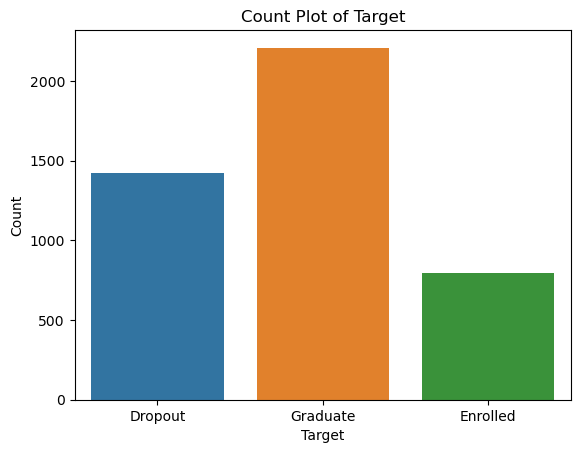

In [334]:
# Count plot of Target(Dropout, Graduate, Enrolled)
sns.countplot(x='Target', data=df)
plt.title('Count Plot of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [335]:
# Calculate percentages
percentages = df['Target'].value_counts(normalize=True) * 100
print("\nTargetPercentages:\n", percentages)


TargetPercentages:
 Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: Target, dtype: float64


 ### Data Imbalance
 
There is a strong imbalance in target distribution among the classes. The majority class, Graduate,
represents 50%, Dropout represents 32% and the minority class Enrolled represents 18% of total records. This might result in a high prediction accuracy driven by the majority class at the expense of a poor performance of the minority class. So at the data-level approach, a sampling technique such as the Synthetic Minority Over Sampling Technique(SMOTE) is used to rebalance the target distribution. 

In [336]:
# Convert Target to numerical
df["Target"].replace('Dropout', 0, inplace=True)
df["Target"].replace('Graduate', 1, inplace=True)
df["Target"].replace('Enrolled', 2, inplace=True)

In the Target column, we are focussing on students who are "Dropout" or "Graduate". So we are dropping those students who are enrolled.

In [337]:
# Removing enrolled from the Target variable
df = df[df.Target != 2]
df.shape

(3630, 37)

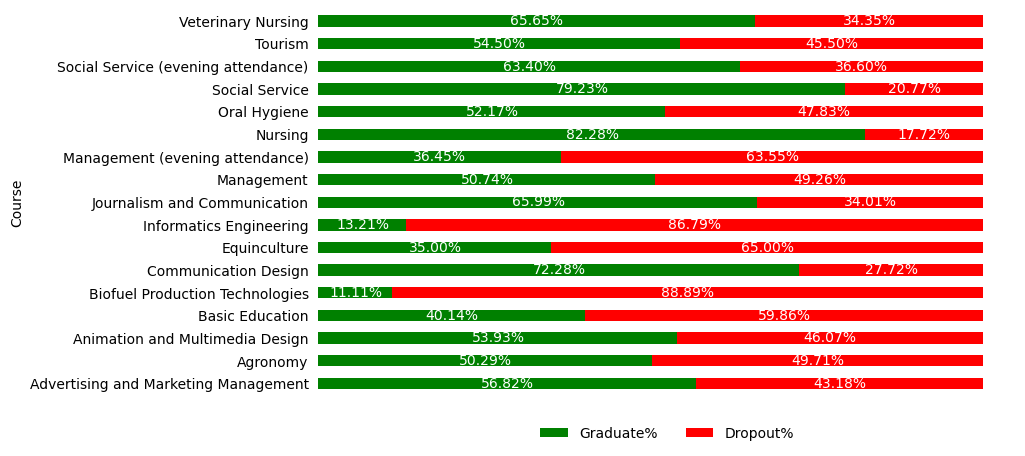

In [338]:
# Student outcome by course

df_Course = df.groupby(["Course", "Target"]).size().reset_index(name='Count')
mapping = {33: 'Biofuel Production Technologies', 171: 'Animation and Multimedia Design', 
           8014: 'Social Service (evening attendance)', 9003: 'Agronomy',
           9070: 'Communication Design',9085: 'Veterinary Nursing',
           9119: 'Informatics Engineering',9130: 'Equinculture',
           9147: 'Management',9238: 'Social Service',
           9254: 'Tourism',9500: 'Nursing',9556: 'Oral Hygiene',
           9670: 'Advertising and Marketing Management',9773: 'Journalism and Communication',
           9853: 'Basic Education',9991: 'Management (evening attendance)'}

# Use the replace method to change values
df_Course['Course'] = df_Course['Course'].replace(mapping)

df_Course = df_Course.pivot(*df_Course).rename_axis(columns = None).reset_index()
df_Course = df_Course.rename(columns={0: 'Dropout'})
df_Course = df_Course.rename(columns={1: 'Graduate'})
df_Course['Total'] = df_Course['Dropout']+df_Course['Graduate']
df_Course['Graduate%']=(df_Course['Graduate']/df_Course['Total']*100).round(2)
df_Course['Dropout%']=(df_Course['Dropout']/df_Course['Total']*100).round(2)

df_CoursePercent = df_Course
df_CoursePercent = df_CoursePercent.drop(['Dropout', 'Graduate', 'Total'], axis=1)
df_CoursePercent = df_CoursePercent.set_index('Course')

# create the plot
ax = df_CoursePercent.plot(kind='barh', stacked=True, figsize=(9, 5), color=['green', 'red'], xticks=[])
# move the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

# remove ticks
ax.tick_params(left=False, bottom=False)
# remove all spines
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

# iterate through each container
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')

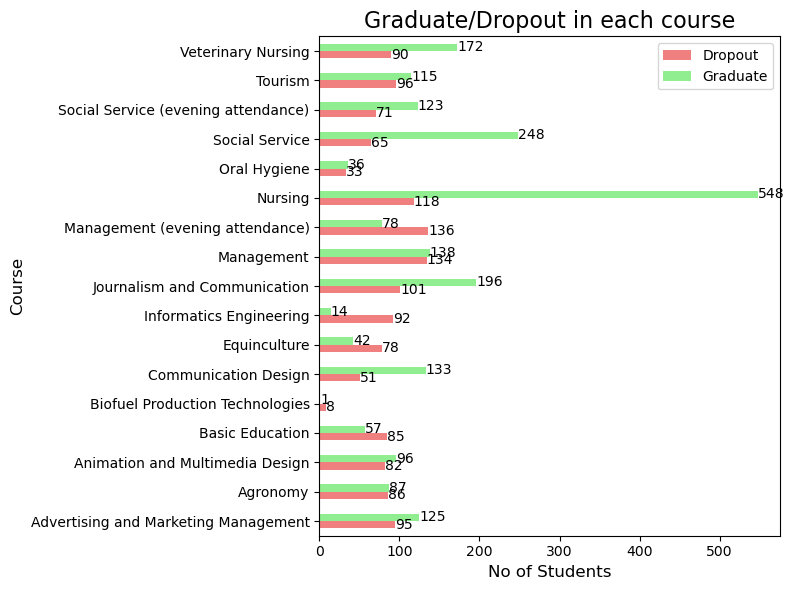

In [339]:
df_Course = df_Course.drop(['Dropout%', 'Graduate%', 'Total'], axis=1)
ax = df_Course.plot.barh(x='Course', color=['lightcoral', 'lightgreen'], figsize=(8, 6))

# Adding count labels on top of the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Customizations
ax.set_title('Graduate/Dropout in each course', fontsize=16)
ax.set_xlabel('No of Students', fontsize=12)
ax.set_ylabel('Course', fontsize=12)
#ax.legend(title='Subcategories')

# Display the chart
plt.tight_layout()
plt.show()


Most successful courses are Nursing and Social Service. On the opposite side, the technologies field with the courses of Biofuel Production Technologies and Informatics Engineering presents the most unsuccessful results and the drop rate is also more. 

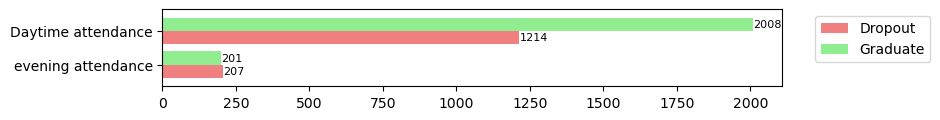

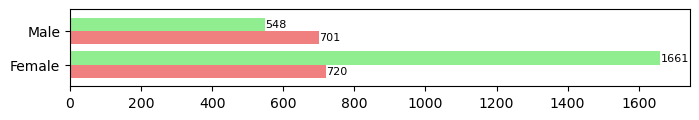

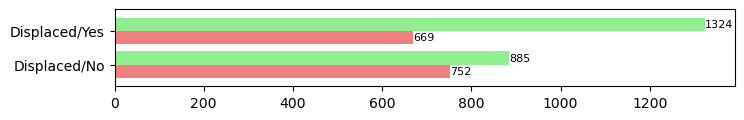

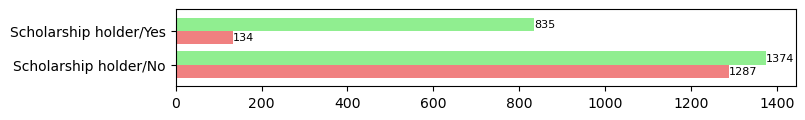

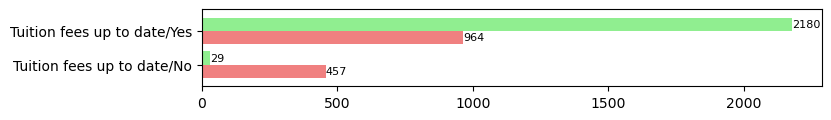

In [340]:
# Student outcome by gender, student displaced, tuition fees up to date, 
# scholarship holder, and evening/daytime attendance.

df_studentoutcome = df[['Daytime/evening attendance', 'Displaced', 'Scholarship holder',
                        'Gender','Tuition fees up to date','Target']].copy()
columns_to_plot = ['Daytime/evening attendance', 'Displaced', 
                   'Scholarship holder','Gender','Tuition fees up to date']
df_studentoutcome["Target"].replace(1,'Graduate', inplace=True)
df_studentoutcome["Target"].replace(0, 'Dropout', inplace=True)



df_grouped =  df_studentoutcome.groupby(["Daytime/evening attendance", "Target"]).size().reset_index(name='Count')
df_grouped = df_grouped.pivot(*df_grouped ).rename_axis(columns = None).reset_index()
df_grouped["Daytime/evening attendance"].replace(0, 'evening attendance', inplace=True)
df_grouped["Daytime/evening attendance"].replace(1,'Daytime attendance', inplace=True)
ax1 = df_grouped.set_index('Daytime/evening attendance').plot.barh(figsize=(8, 1),width=0.8,color=['lightcoral', 'lightgreen'])

for i in ax1.containers:
    ax1.bar_label(i, label_type='edge',fontsize=8)
    #ax1.bar_label(i,color='w')
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')


df_grouped =  df_studentoutcome.groupby(["Gender", "Target"]).size().reset_index(name='Count')
df_grouped = df_grouped.pivot(*df_grouped ).rename_axis(columns = None).reset_index()
df_grouped["Gender"].replace(0, 'Female', inplace=True)
df_grouped["Gender"].replace(1,'Male', inplace=True)
ax2 = df_grouped.set_index('Gender').plot.barh(figsize=(8, 1),width=0.8,color=['lightcoral', 'lightgreen'])

for i in ax2.containers:
    ax2.bar_label(i, label_type='edge',fontsize=8)
ax2.get_legend().remove()
plt.ylabel("")



df_grouped =  df_studentoutcome.groupby(["Displaced", "Target"]).size().reset_index(name='Count')
df_grouped = df_grouped.pivot(*df_grouped ).rename_axis(columns = None).reset_index()
df_grouped["Displaced"].replace(0, 'Displaced/No', inplace=True)
df_grouped["Displaced"].replace(1,'Displaced/Yes', inplace=True)
ax3 = df_grouped.set_index('Displaced').plot.barh(figsize=(8, 1),width=0.8,color=['lightcoral', 'lightgreen'])

for i in ax3.containers:
    ax3.bar_label(i, label_type='edge',fontsize=8)
ax3.get_legend().remove()
plt.ylabel("")


df_grouped =  df_studentoutcome.groupby(["Scholarship holder", "Target"]).size().reset_index(name='Count')
df_grouped = df_grouped.pivot(*df_grouped ).rename_axis(columns = None).reset_index()
df_grouped["Scholarship holder"].replace(0, 'Scholarship holder/No', inplace=True)
df_grouped["Scholarship holder"].replace(1,'Scholarship holder/Yes', inplace=True)
ax4 = df_grouped.set_index('Scholarship holder').plot.barh(figsize=(8, 1),width=0.8,color=['lightcoral', 'lightgreen'])

for i in ax4.containers:
    ax4.bar_label(i, label_type='edge',fontsize=8)
ax4.get_legend().remove()
plt.ylabel("")

df_grouped =  df_studentoutcome.groupby(["Tuition fees up to date", "Target"]).size().reset_index(name='Count')
df_grouped = df_grouped.pivot(*df_grouped ).rename_axis(columns = None).reset_index()
df_grouped["Tuition fees up to date"].replace(0, 'Tuition fees up to date/No', inplace=True)
df_grouped["Tuition fees up to date"].replace(1,'Tuition fees up to date/Yes', inplace=True)
ax5 = df_grouped.set_index('Tuition fees up to date').plot.barh(figsize=(8, 1),width=0.8,color=['lightcoral', 'lightgreen'])

for i in ax5.containers:
    ax5.bar_label(i, label_type='edge',fontsize=8)
ax5.get_legend().remove()
plt.ylabel("")

plt.show()

From this graph we can see that females are most successful, as well as the students that hold a scholarship and have their tuition fees up to date. Regarding the attendance regime (daytime or evening), the results show that students with daytime attendance finish the course earlier than evening students, as well as the students that are displaced from their homes.

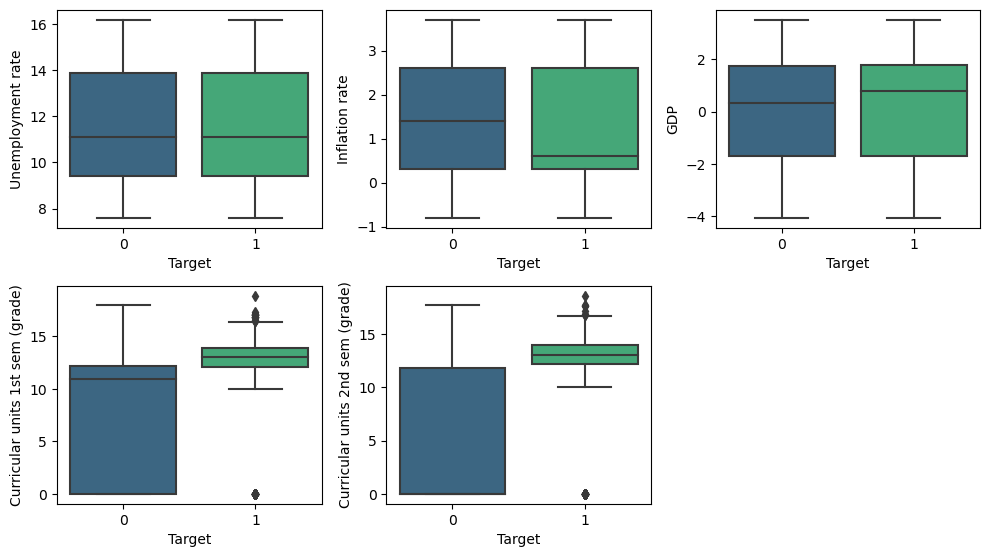

In [341]:
# Lets explore other continuous variables 
df_continuousvar = df[['Unemployment rate', 'Inflation rate', 'GDP',
                        'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Target']].copy()
plt.figure(figsize=(10, 8))
gs = GridSpec(3, 3)

for i, col in enumerate(df_continuousvar.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=df_continuousvar, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

## Correlation

In [342]:
correlation_matrix = df.corr()
correlation_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.274985,-0.130370,0.042012,-0.265823,0.070984,-0.038869,-0.008899,0.185117,0.124995,...,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.018959,0.011932,-0.028391,-0.100479
Application mode,0.274985,1.000000,-0.287245,0.063112,-0.310854,0.416666,-0.071190,-0.011711,0.122697,0.098216,...,0.244575,0.130559,0.163626,-0.085270,-0.137288,0.060434,0.072870,-0.021895,-0.023945,-0.244507
Application order,-0.130370,-0.287245,1.000000,0.056238,0.165494,-0.187881,-0.051715,-0.026706,-0.058649,-0.055254,...,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,0.094355
Course,0.042012,0.063112,0.056238,1.000000,-0.033887,-0.000230,-0.081792,-0.036492,0.039976,0.043931,...,-0.078037,0.415262,0.281016,0.199739,0.335016,0.033454,0.010375,0.027855,-0.014411,0.038135
Daytime/evening attendance,-0.265823,-0.310854,0.165494,-0.033887,1.000000,-0.087616,0.063810,0.030334,-0.188876,-0.135725,...,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.067192,-0.017326,0.005007,0.084496
Previous qualification,0.070984,0.416666,-0.187881,-0.000230,-0.087616,1.000000,0.089194,-0.025211,-0.021399,0.003865,...,0.147389,0.054375,0.094175,-0.010854,-0.008933,0.022257,0.102451,-0.070746,0.072121,-0.062323
Previous qualification (grade),-0.038869,-0.071190,-0.051715,-0.081792,0.063810,0.089194,1.000000,0.053888,-0.073035,-0.047147,...,-0.026107,-0.036162,-0.061730,0.055232,0.068240,-0.023654,0.043345,0.019247,-0.054349,0.109464
Nationality,-0.008899,-0.011711,-0.026706,-0.036492,0.030334,-0.025211,0.053888,1.000000,-0.038168,-0.073033,...,-0.004657,-0.029476,-0.032890,-0.024523,-0.014859,-0.014388,0.003110,-0.005440,0.017080,-0.015516
Mother's qualification,0.185117,0.122697,-0.058649,0.039976,-0.188876,-0.021399,-0.073035,-0.038168,1.000000,0.543890,...,0.041687,0.033219,0.033510,-0.026406,-0.034434,0.029799,-0.122171,0.057987,-0.076342,-0.053989
Father's qualification,0.124995,0.098216,-0.055254,0.043931,-0.135725,0.003865,-0.047147,-0.073033,0.543890,1.000000,...,0.047034,0.029756,0.014678,0.001245,-0.008768,0.004103,-0.075372,0.062772,-0.059914,-0.005865


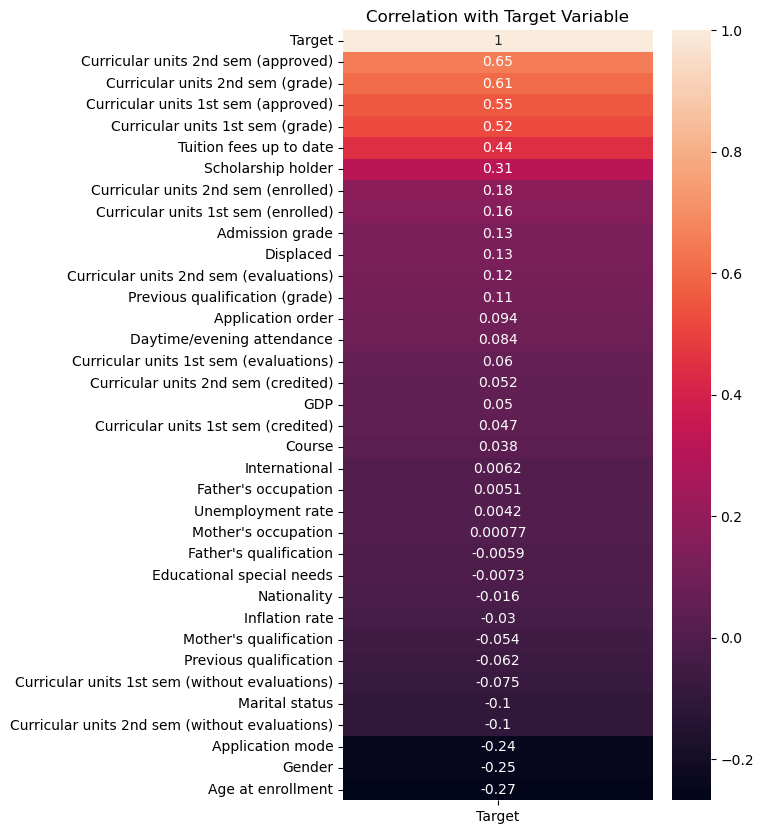

In [343]:
# Correlation between Target and other features 
plt.figure(figsize = (5,10))
sns.heatmap(df.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True)
plt.title('Correlation with Target Variable')
plt.show()

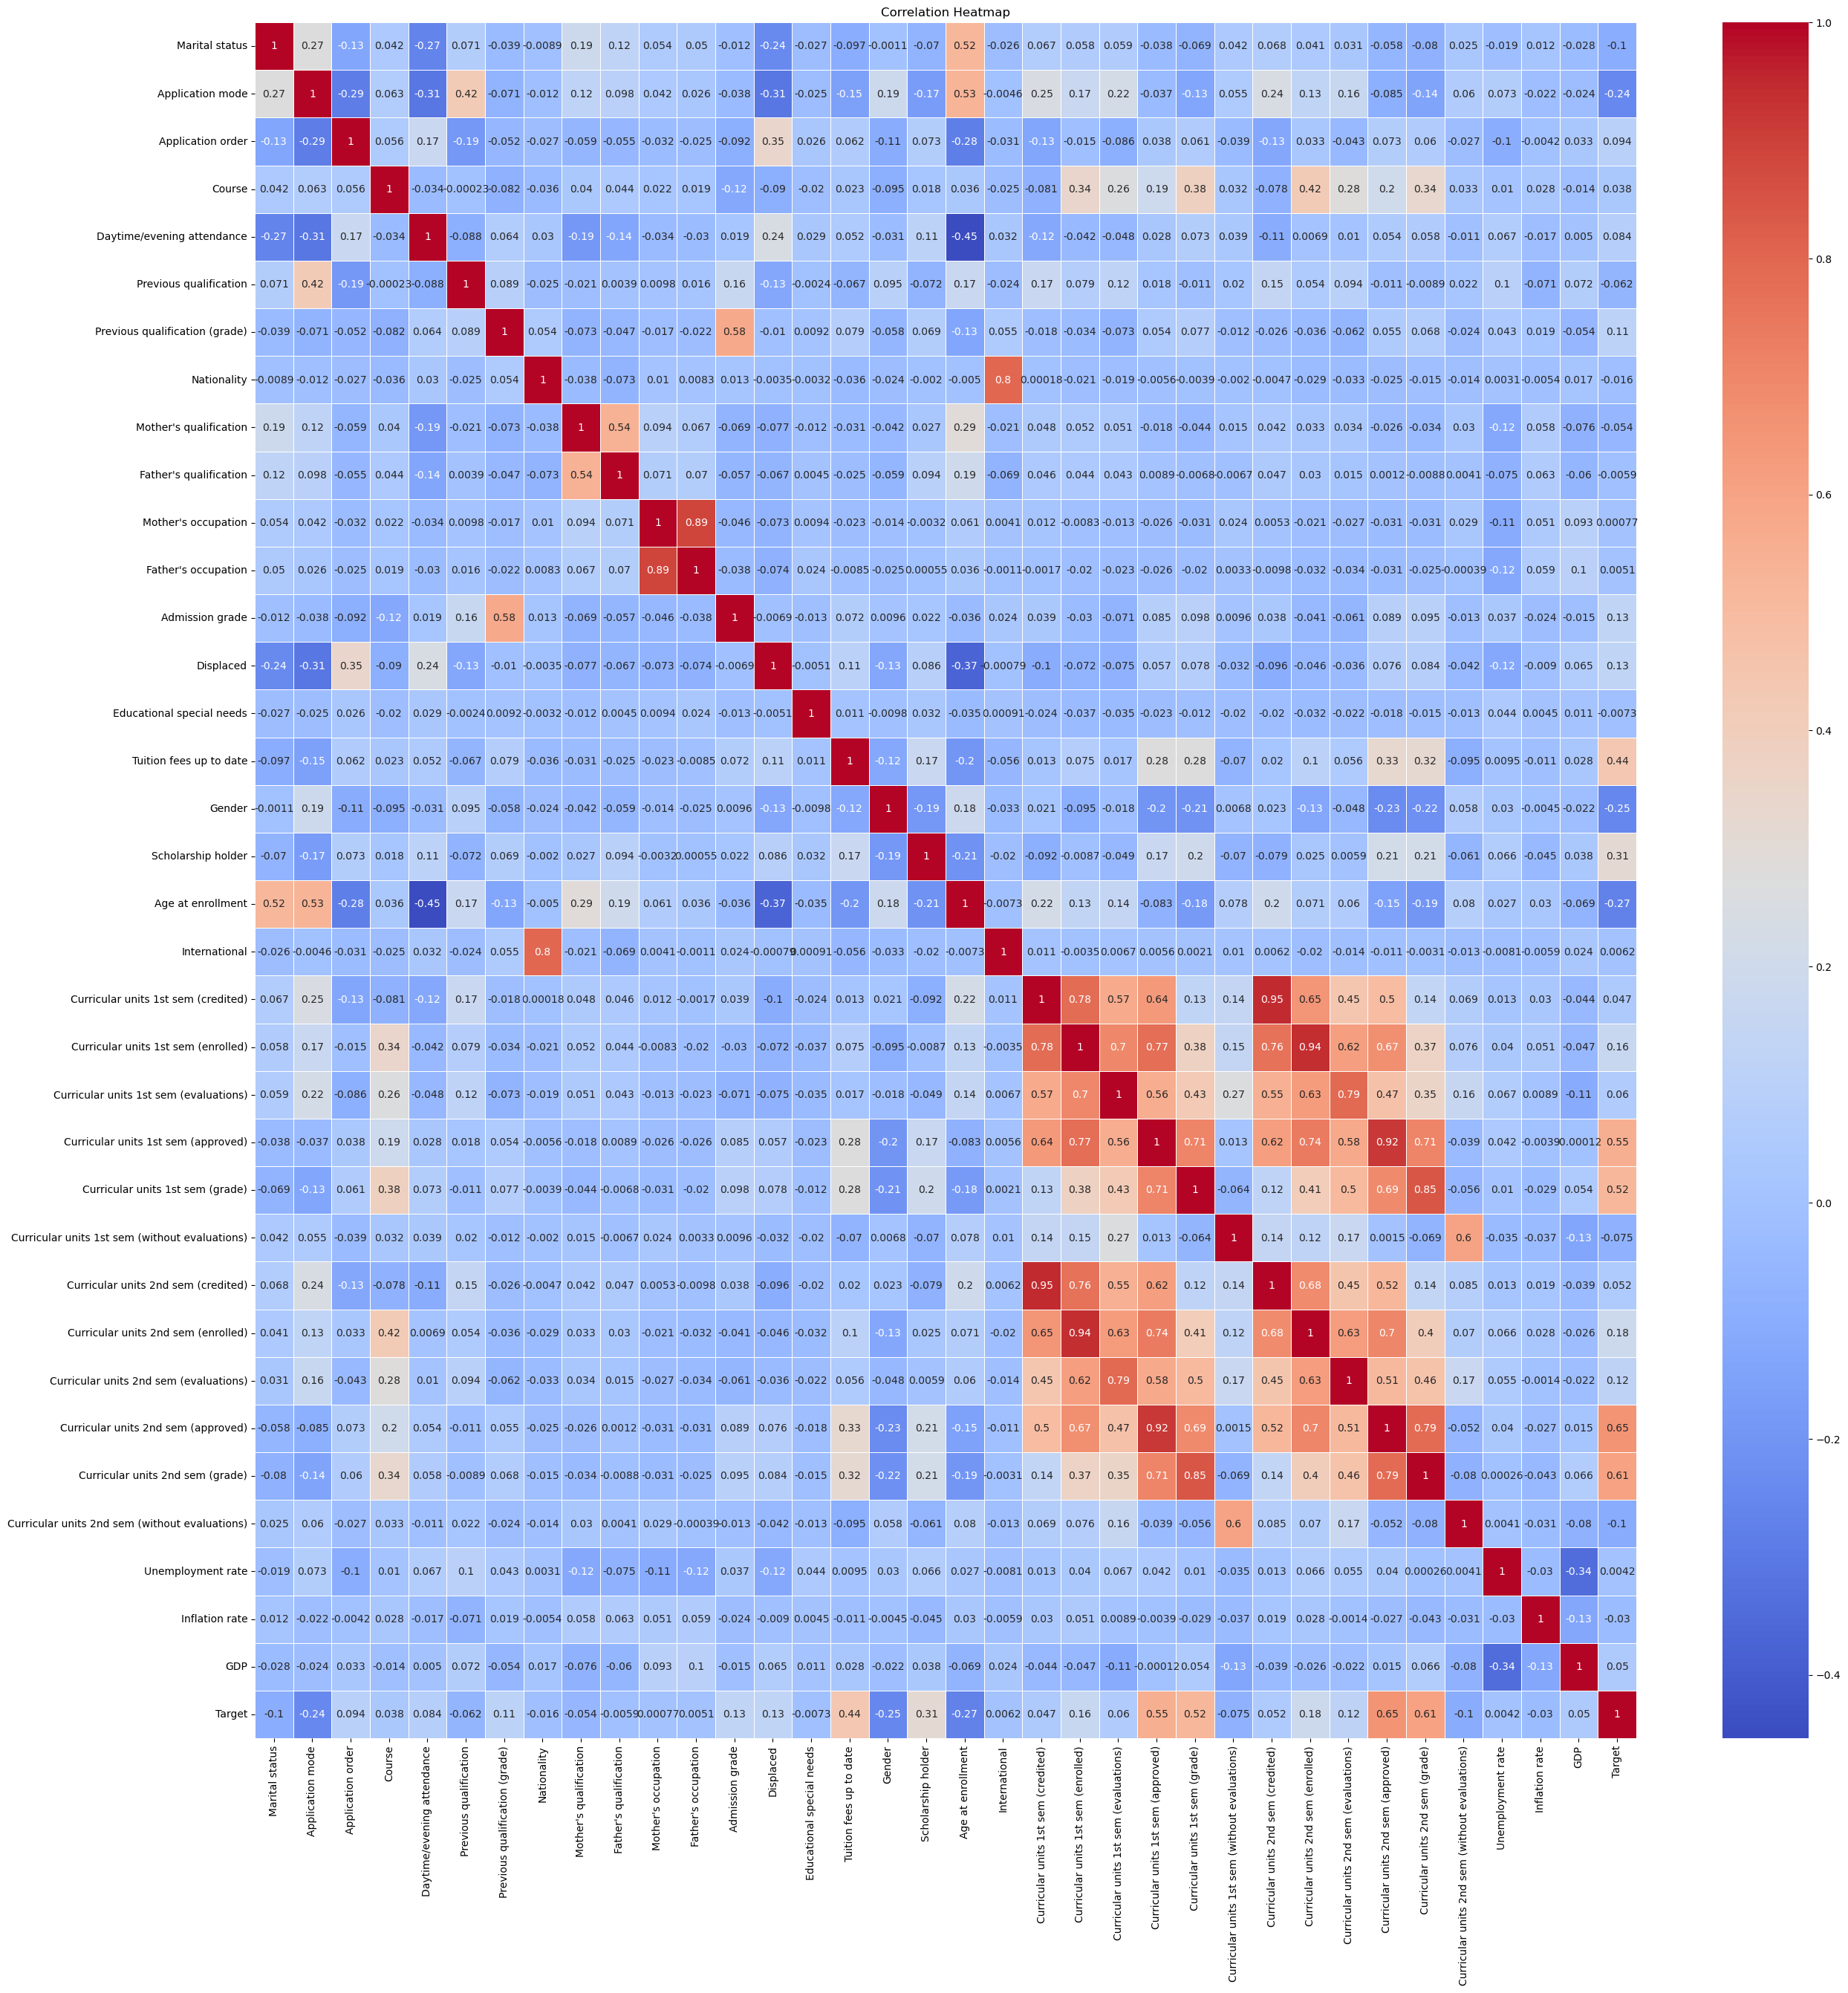

In [344]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

####  Multi-collinearity

There are some pairs of features having high correlation coefficients, which increases multi-collinearity in the dataset. The graph shows that the correlation is strongest in features in the same groups, such as “Nationality” and “International” or “Mother’s occupation” and “Father’s occupation”, but also between the groups related with the performance at the end of the first semester and the second semester, such as “Curricular units 1st sem (approved)” and “Curricular units 2nd sem (approved)”. To detect multi-collinearity
variance inflation factor (VIF) score is calculated. 

VIF score interpretation

VIF = 1: No correlation between variables

VIF between 1 and 5: Moderate correlation

VIF greater than 5: High correlation

VIF greater than 10: Serious correlation that may require further investigation


In [345]:
#creating df_columns dataset
df_columns = df[['Unemployment rate', 'Inflation rate', 'GDP',
                 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)',
                 'Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
                 'Curricular units 1st sem (evaluations)','Curricular units 1st sem (without evaluations)',
                 'Curricular units 1st sem (approved)',
                 'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
                 'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
                 'Curricular units 2nd sem (without evaluations)',
                 'Nationality',"Mother's qualification", "Father's qualification",
                 "Mother's occupation", "Father's occupation", 'Admission grade',
                 'Application mode', 'Application order', 'Course','International']].copy()

In [346]:
#calculate VIF

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    #print(X)
    #print(X.values)
    for i in range(X.shape[1]):
        #print(i)
        #print(variance_inflation_factor(X.values, i))
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    #print(vif)
    return(vif)

In [347]:
X = df.iloc[:,:-1]
calc_vif(df_columns)


,variables,VIF
0,Unemployment rate,20.846743
1,Inflation rate,1.865138
2,GDP,1.205098
3,Curricular units 1st sem (grade),30.412719
4,Curricular units 2nd sem (grade),28.566122
5,Curricular units 1st sem (credited),18.421089
6,Curricular units 1st sem (enrolled),177.375380
7,Curricular units 1st sem (evaluations),19.321575
8,Curricular units 1st sem (without evaluations),1.811622
9,Curricular units 1st sem (approved),51.125862


In [348]:
# removing the features that has very high VIF score
features_to_remove = ['Curricular units 2nd sem (credited)',
                      'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                      'Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)',
                       "International",'Admission grade',"Mother's occupation", 
                      "Mother's qualification",'Curricular units 1st sem (approved)',
                     'Curricular units 1st sem (enrolled)']

In [351]:
# Dropping the features that are highly Correlated
df = df.drop(features_to_remove, axis=1)

In [352]:
#checking VIF after dropping highly correlated features 
df_columns = df[['Inflation rate', 'GDP', "Curricular units 1st sem (evaluations)",
                 "Curricular units 1st sem (credited)", 
                 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)',
                 'Curricular units 1st sem (without evaluations)',
                 'Nationality', "Father's qualification",
                 "Father's occupation",
                 'Application mode', 'Application order', 'Course','Unemployment rate']].copy()

In [353]:
X = df.iloc[:,:-1]
calc_vif(df_columns)

,variables,VIF
0,Inflation rate,1.818291
1,GDP,1.129987
2,Curricular units 1st sem (evaluations),10.038430
3,Curricular units 1st sem (credited),1.846973
4,Curricular units 1st sem (grade),21.426460
5,Curricular units 2nd sem (grade),15.573070
6,Curricular units 1st sem (without evaluations),1.190194
7,Nationality,1.077559
8,Father's qualification,3.112137
9,Father's occupation,1.237750


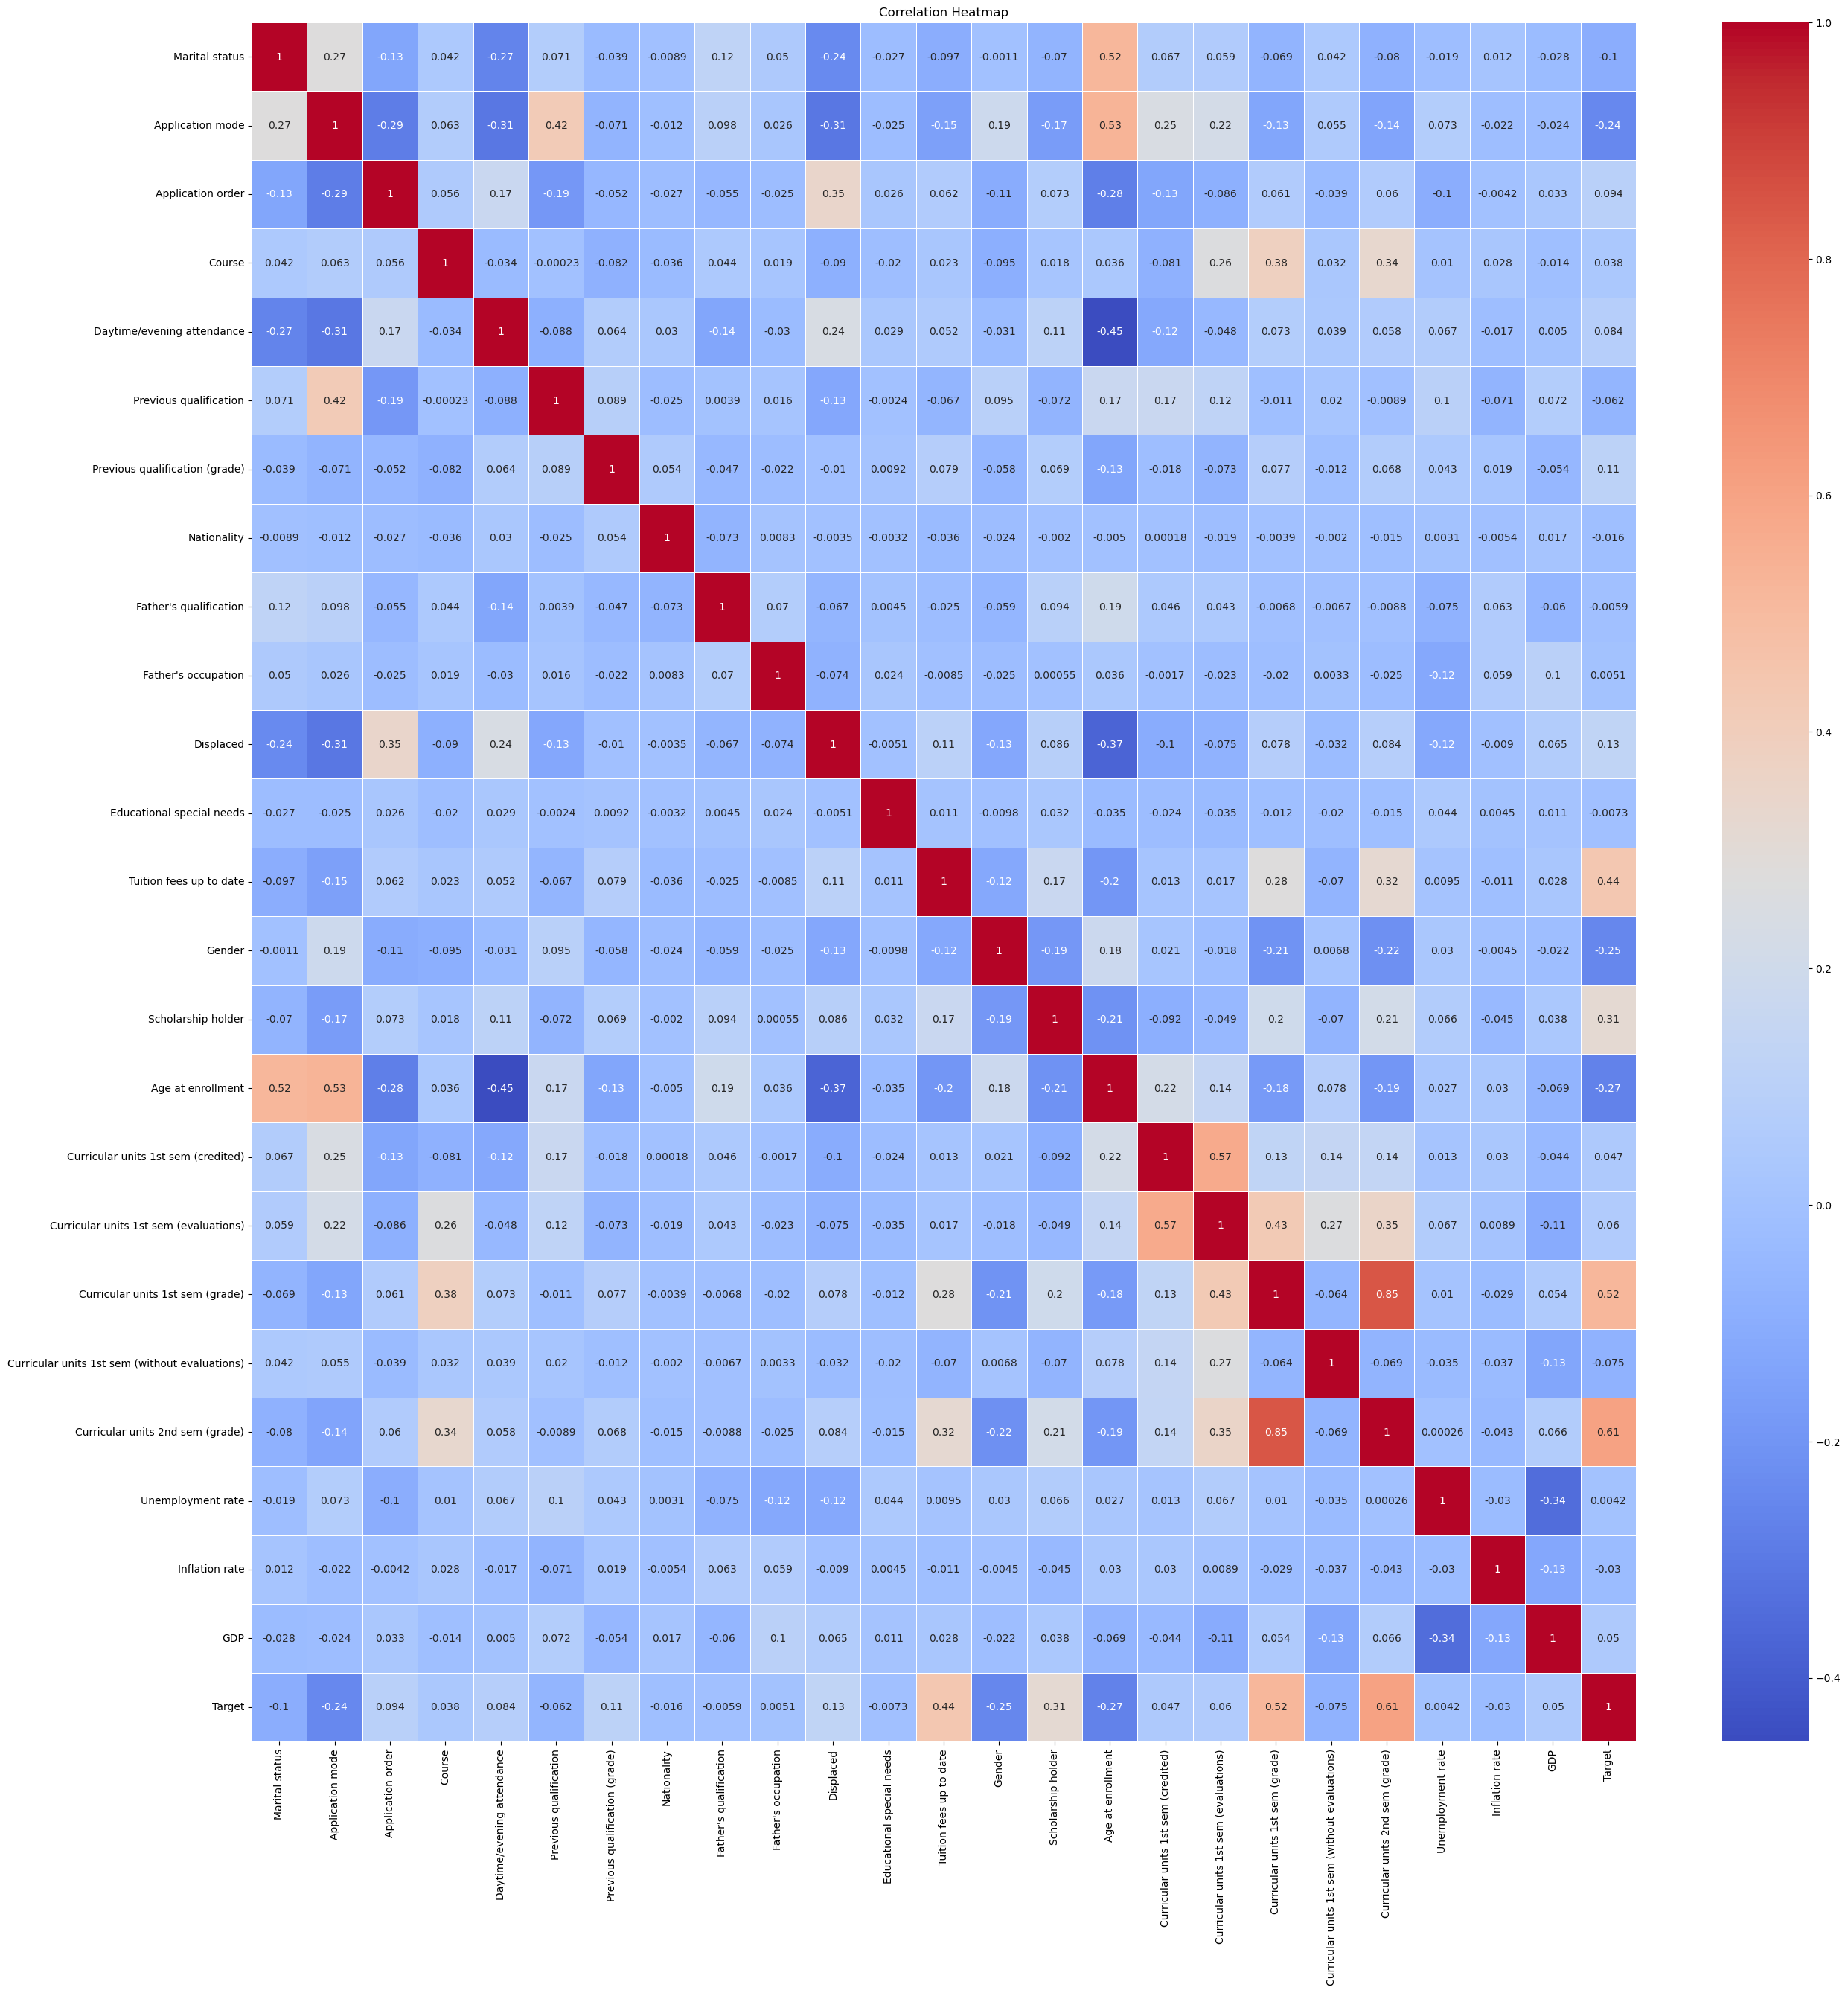

In [354]:
#correlation heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [355]:
print("\nCounts of targets in dataset:")
print("Target 0:", sum(df['Target'] == 0))
print("Target 1:", sum(df['Target'] == 1))


Counts of targets in dataset:
Target 0: 1421
Target 1: 2209


In [356]:
# Calculate counts
counts = df['Target'].value_counts()
print("Target:\n", counts)

# Calculate percentages
percentages = df['Target'].value_counts(normalize=True) * 100
print("\nTargetPercentages:\n", percentages)

Target:
 1    2209
0    1421
Name: Target, dtype: int64

TargetPercentages:
 1    60.853994
0    39.146006
Name: Target, dtype: float64


## Model Selection and Training

### Apply SMOTETomek for Resampling

Use SMOTETomek to handle class imbalance by oversampling the minority class and under-sampling the majority class.

In [390]:
# test and train sets 
X = df.drop('Target', axis=1)
y = df['Target']

smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (3323, 25)
X_test :  (831, 25)
y_train :  (3323,)
y_test :  (831,)


In [391]:
algorithms = ['K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 
              'Random Forest','Easy Ensemble Classifier','AdaBoost Classifier','SVM']
accuracies = []
precisions = []
recalls = []
f1_scores = []

#storing the mertrics of all algorithms 
def append_metrics(accuracy, precision, recall, f1):
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

### K-Nearest Neighbors



Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1-score: 0.79


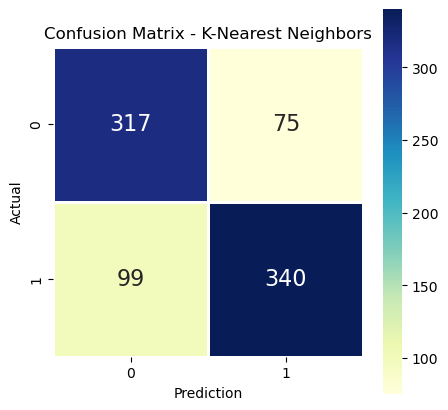

In [392]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred1 = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred1)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred1, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix - K-Nearest Neighbors")

plt.show()

### Logistic Regression


Logistic Regression with Hyperparameter Tuning:
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1-score: 0.83


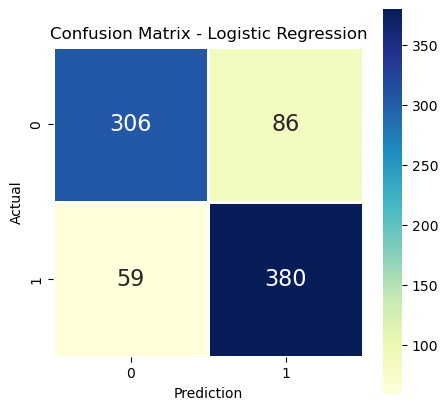

In [393]:
logistic_model = LogisticRegression(C=1, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred2 = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred2, average='weighted')

print("\nLogistic Regression with Hyperparameter Tuning:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm_logistic_tuned = confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_logistic_tuned, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Decision Tree

Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-score: 0.86


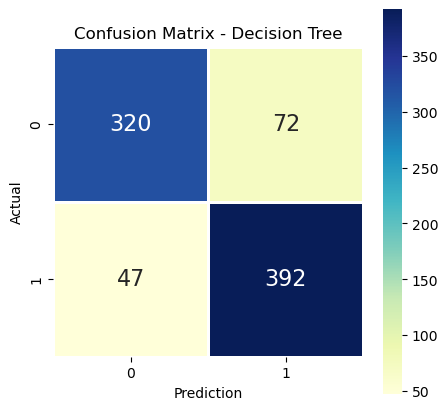

In [394]:
tree_clf = DecisionTreeClassifier(max_features='auto', 
                                        ccp_alpha=0.001, 
                                        max_depth=15, 
                                        criterion='gini',random_state=1234 )
tree_clf.fit(X_train, y_train)

y_pred3 = tree_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred3, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred3)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### Random Forest

Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 150}
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89


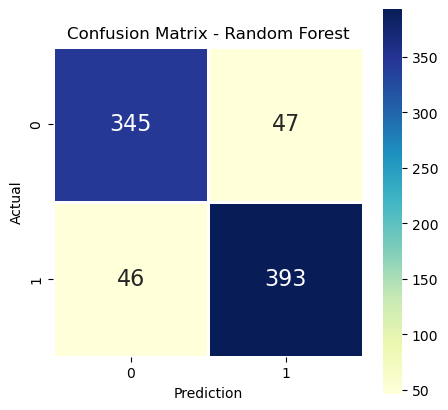

In [395]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30],'max_features':['sqrt', 'log2']}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params  = grid_search.best_params_
print("Best parameters:", best_params)


best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],
                                max_features=best_params['max_features'])
best_rf.fit(X_train, y_train)

y_pred4 = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred4, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred4)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

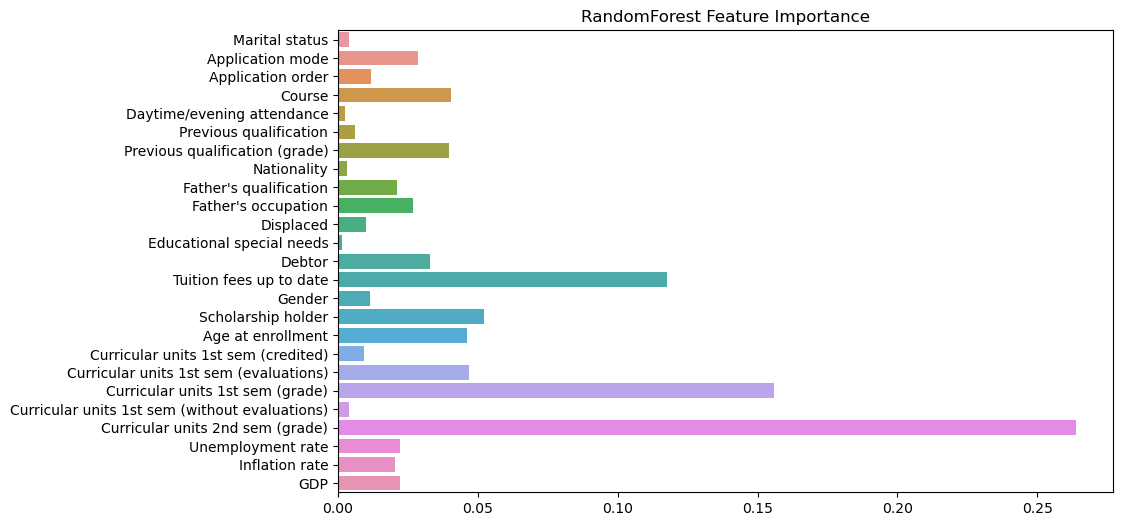

In [396]:
#Feature importance
feature_importances = best_rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("RandomForest Feature Importance")
plt.show()

### Easy Ensemble Classifier

Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-score: 0.87


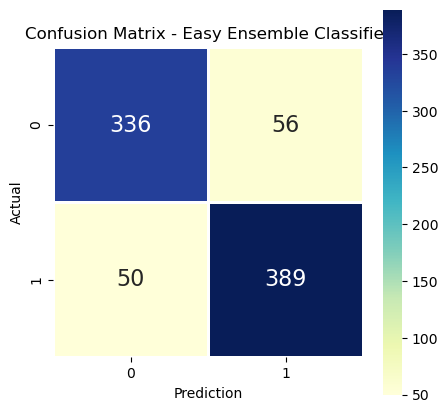

In [397]:
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train)
y_pred5 = eec.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred5, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred5)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix - Easy Ensemble Classifier")
plt.show()

### AdaBoost Classifier

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'learning_rate': 1, 'n_estimators': 180}
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-score: 0.87


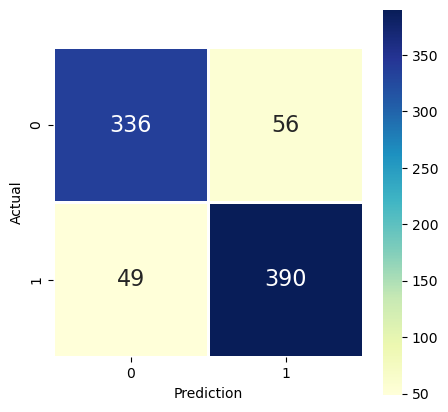

In [398]:
ada=AdaBoostClassifier()

param_grid={'n_estimators' : [50, 70, 90, 120, 180, 200],
                           'learning_rate' : [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(ada,param_grid, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)
best_params  = grid_search.best_params_
print("Best parameters:", best_params)



AdaBoost = AdaBoostClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'],
                              random_state=0)
AdaBoost.fit(X_train, y_train)

y_pred6 = AdaBoost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred6)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred6, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred6)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

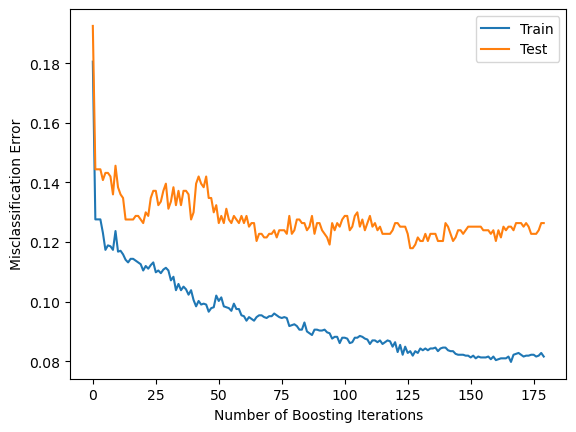

In [399]:
# misclassification error for train data
staged_score = AdaBoost.staged_score(X_train,y_train)
misclassification_error = []

for i, score in enumerate(staged_score):
    misclassification_error.append(1-score)

# misclassification error for test data
staged_score_test = AdaBoost.staged_score(X_test,y_test)    
misclassification_error_test = []
for i, score in enumerate(staged_score_test):
     misclassification_error_test.append(1-score)

plt.plot(misclassification_error,label="Train")
plt.plot(misclassification_error_test, label="Test")
plt.xlabel('Number of Boosting Iterations')  
plt.ylabel('Misclassification Error') 
plt.legend()
plt.show()

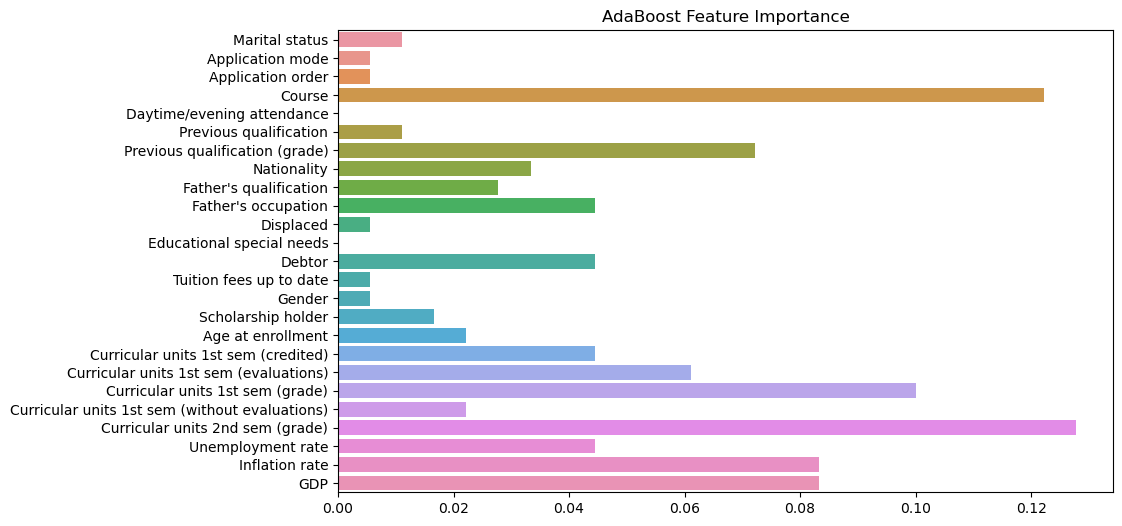

In [400]:
# Get feature importances
importances = AdaBoost.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("AdaBoost Feature Importance")
plt.show()

### Support Vector Machine

In [401]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', refit=True, verbose=3)
grid_search.fit(X_train, y_train)

best_params_SVC = grid_search.best_params_
print("Best Parameters:", best_params_SVC)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.620 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.517 total time=   0.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.513 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.508 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.515 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.717 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.3s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.820 total time=   0.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.818 total time=   0.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.823 total time=   0.3s
[CV 4/5] END ....C=1000, gam

Best Parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-score: 0.88


<Axes: >

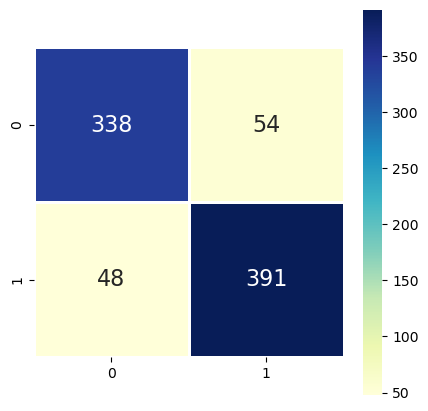

In [402]:
print("Best Parameters:", best_params_SVC)

best_svc = SVC(gamma=best_params_SVC['gamma'], kernel=best_params_SVC['kernel'], C=best_params_SVC['C'])
best_svc.fit(X_train, y_train)

y_pred7 = best_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred7)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred7, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred7)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

### Result Comparison 

In [403]:
#display results
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1
})
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Algorithm,Accuracy,Precision,Recall,F1
3,Random Forest,0.888087,0.888074,0.888087,0.8772
6,SVM,0.877256,0.877235,0.877256,0.8772
5,AdaBoost Classifier,0.873646,0.873632,0.873646,0.8772
4,Easy Ensemble Classifier,0.872443,0.872416,0.872443,0.8772
2,Decision Tree,0.856799,0.857615,0.856799,0.8772
1,Logistic Regression,0.825511,0.826256,0.825511,0.8772
0,K-Nearest Neighbors,0.790614,0.792267,0.790614,0.8772


In [404]:
#function to plot ROC curve 
def show_ROCs(scores_list: list, ys_list: list, labels_list:list = None):
    """
    This function plots a couple of ROCs. Corresponding labels are optional.

    Parameters
    ----------
    scores_list : list of array-likes with scorings or predicted probabilities.
    ys_list : list of array-likes with ground true labels.
    labels_list : list of labels to be displayed in plotted graph.

    Returns
    ----------
    None

    """
    if len(scores_list) != len(ys_list):
        raise Exception('len(scores_list) != len(ys_list)')
    fpr_dict = dict()
    tpr_dict = dict()
    for x in range(len(scores_list)):
        fpr_dict[x], tpr_dict[x], _ = roc_curve(ys_list[x], scores_list[x])
    for x in range(len(scores_list)):
        try:
            plot_ROC(fpr_dict[x], tpr_dict[x], str(labels_list[x]) + ' AUC:' + str(round(auc(fpr_dict[x], tpr_dict[x]),3)))
        except:
            plot_ROC(fpr_dict[x], tpr_dict[x], str(x) + ' ' + str(round(auc(fpr_dict[x], tpr_dict[x]),3)))
    plt.show()

def plot_ROC(fpr, tpr, label):
    """
    This function plots a single ROC. Corresponding label is optional.
    Parameters
    ----------
    fpr : array-likes with fpr.
    tpr : array-likes with tpr.
    label : label to be displayed in plotted graph.

    Returns
    ----------
    None

    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=label)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

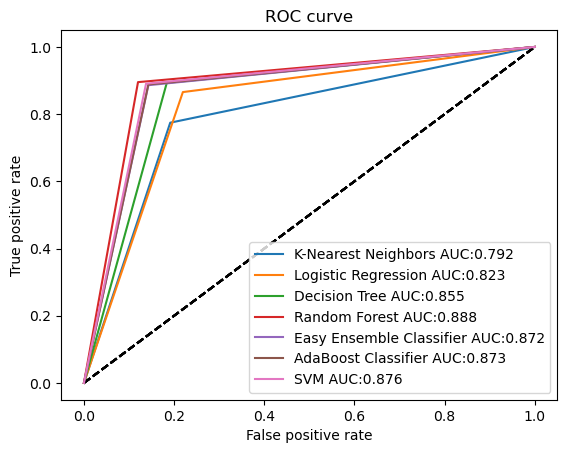

In [405]:
show_ROCs(
    [y_pred1, y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,y_pred7],
    [y_test, y_test,y_test,y_test,y_test,y_test,y_test],
    ['K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 
              'Random Forest','Easy Ensemble Classifier','AdaBoost Classifier','SVM']
)

## Conclusion

After analyzing the dataset using a variety of machine learning algorithms, the Random Forest model showed the best performance with an accuracy of 88% in predicting student dropout and academic success. Key predictors of success/dropout in graduation included factors such as Curricular units 2nd sem (grade), Curricular units 1st sem (grade), Course, Previous qualification, Inflation rate, and GDP. The model  valuable insights for early identification of at-risk students, which can help educational institutions design timely interventions. However, challenges such as data quality and feature imbalance were noted, and further work is needed to refine the model by incorporating additional features and addressing overfitting. Overall, this analysis provides actionable insights that can guide student retention strategies and improve academic success in educational institutions.


